In [4]:
import os
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import pickle

from tqdm import tqdm

KNOTS_2_MS = 1/1.94384

AIRPORTS = {
    "kmdw": "#0072bb",
    "kewr": "#519872",
    "ksea": "#682D63",
    "kbos": "#ca3c25"
}
num_airports = len(AIRPORTS.keys())

BASE_DIR = 'histograms'
OUT_DIR = f"./out/{BASE_DIR}"
os.makedirs(OUT_DIR, exist_ok=True)

In [5]:
MPFILE = 'aceleration_stats_aircraft'
INPUT_FILE = f"./motion_profiles/{MPFILE}.pkl"
with open(INPUT_FILE, 'rb') as f:
    x = pickle.load(f)

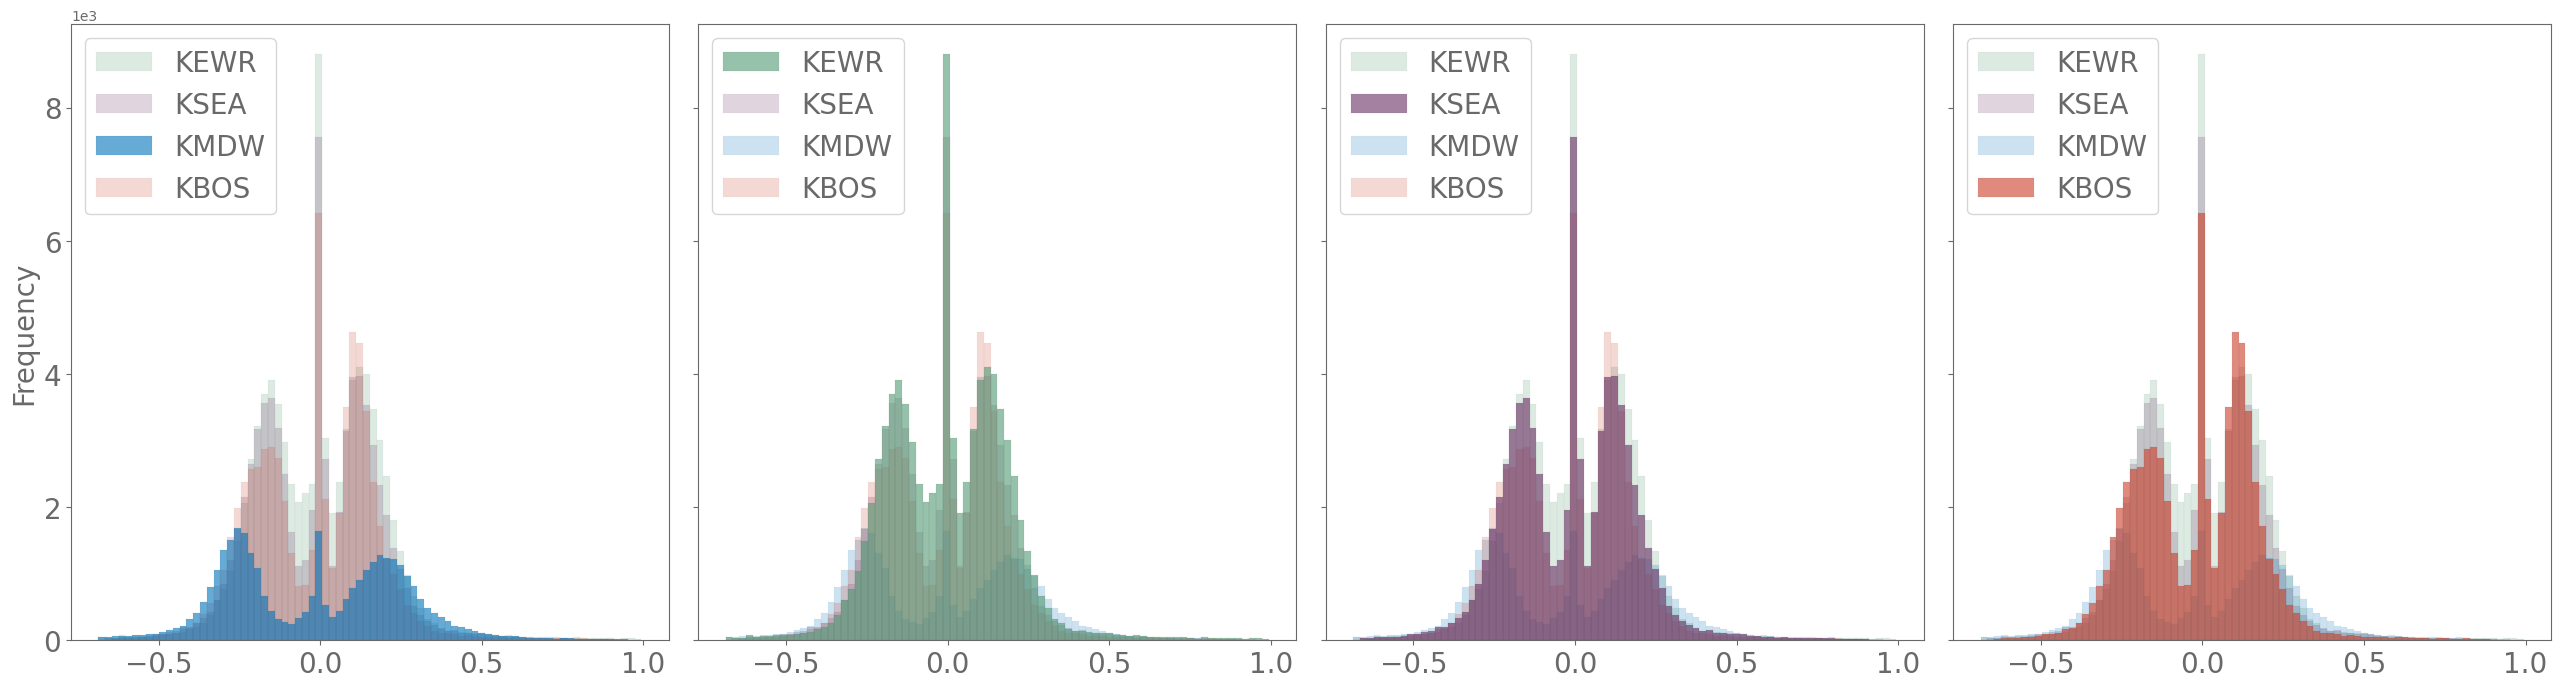

In [6]:
bins = 80
fontcolor = 'dimgray'
qlow, qupp = True, True

fig, ax = plt.subplots(1, num_airports, figsize=(8 * num_airports, 8), sharey=True, squeeze=True)

for na, (selected_airport, color) in enumerate(AIRPORTS.items()):
    for airport, data in x['mean'].items():
        # print(f"Selected: {selected_airport}, Current: {airport}, Data: {data.shape}")
        # ax[na].set_xlabel('𝚫Vel (㎨)', color=fontcolor, fontsize=20)

        if qlow:
            q_lower = np.quantile(data, 0.005)
            data = data[data >= q_lower]

        if qupp:
            q_upper = np.quantile(data, 0.995)
            data = data[data <= q_upper]
        
        alpha, zorder, color, label = 0.2, 1, AIRPORTS[airport], airport.upper()
        if airport == selected_airport:
            alpha, zorder = 0.6, 1000
    
        freq, bins, patches = ax[na].hist(
            data, 
            bins=bins, 
            color=color, 
            edgecolor=fontcolor, 
            linewidth=0.1 , 
            alpha=alpha, 
            # density=True, 
            label=label, 
            zorder=zorder
        )

    ax[na].legend(loc='upper left', labelcolor=fontcolor, fontsize=20)

ax[0].set_ylabel('Frequency', color=fontcolor, fontsize=20)
ax[0].ticklabel_format(style='sci', scilimits=(0,3),axis='both')
for a in ax:
    a.tick_params(color=fontcolor, labelcolor=fontcolor)
    for spine in a.spines.values():
        spine.set_edgecolor(fontcolor)
        a.yaxis.set_tick_params(labelsize=20)
        a.xaxis.set_tick_params(labelsize=20)
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.savefig(f"{OUT_DIR}/{MPFILE}.png", dpi=600, bbox_inches='tight')